<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/ML_Model_for_predicting_car_emmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model for Predicting a car's CO2 emmission
We build a simple model using the ***cars.csv*** data set for predicting a car's CO2 emmission. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo Date: 5/9/2021



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

**1. Read dataset and display columns¶**


In [ ]:
cars_df=pd.read_csv('/content/cars.csv')
cars_df

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


**2. Calculate basic statistics of the data¶**

In [ ]:
cars_df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [ ]:
#To check the summary statistics of only the categorical features, we will use 
cars_df.describe(include='object')


,Car,Model
count,36,36
unique,17,35
top,Mercedes,Fiesta
freq,5,2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


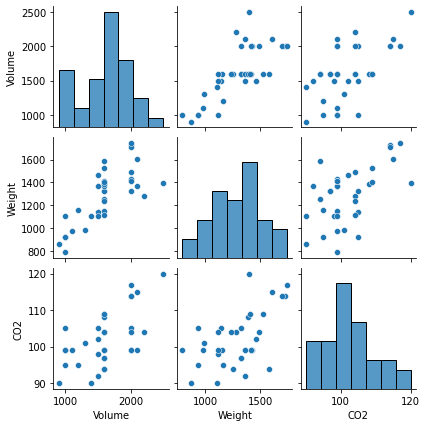

In [ ]:
cols = ['Volume', 'Weight', 'CO2']
sns.pairplot(cars_df[cols], size=2.0)



**Obervations**

The variables are on different scales example weight variable ranges from about 790 to 1746 while volume ranges from about 900 to 2500. See the probability distribution below. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data.
2) We also observe that the target variable 'CO2' correlates well with 2 predictor variables, volume, and 'weight'.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


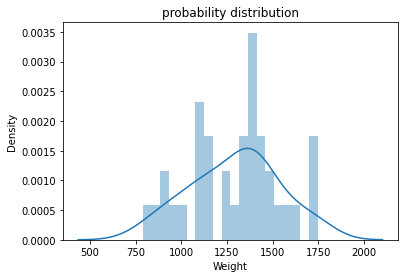

In [ ]:
sns.distplot(cars_df['Weight'],bins=20)
plt.title('probability distribution')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


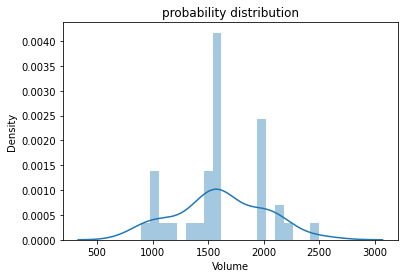

In [ ]:
sns.distplot(cars_df['Volume'],bins=20)
plt.title('probability distribution')
plt.show()


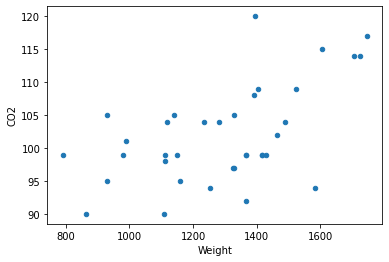

In [ ]:
#scatter plot between weight and CO2
cars_df.plot(x="Weight",
              y="CO2",
              kind='scatter')

In [ ]:
cars_df.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


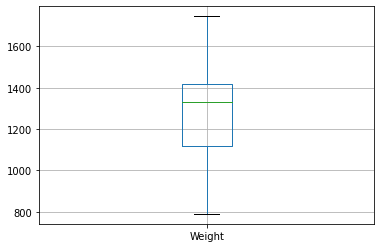

In [ ]:
cars_df.boxplot('Weight', return_type = 'axes')
